In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler



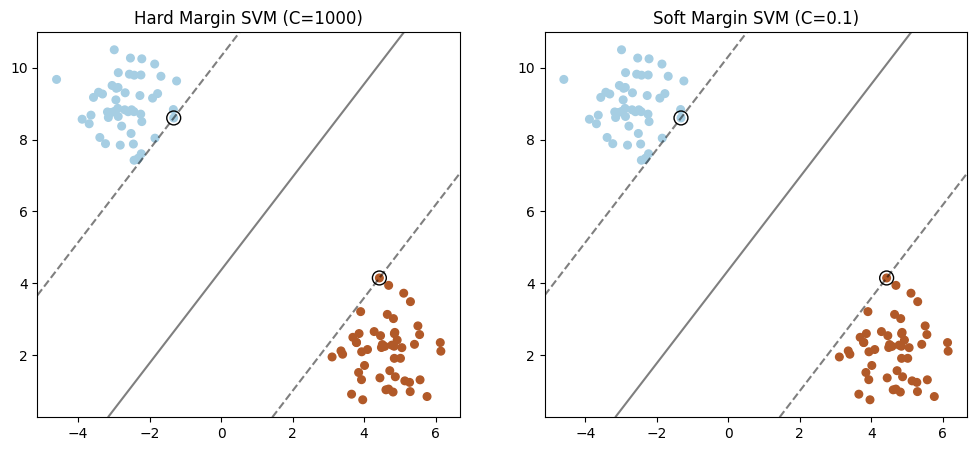

'\nExplanation:\n- Hard Margin (Left):\n  - Maximizes the margin between classes\n  - Strictly enforces classification (no misclassifications)\n  - Sensitive to outliers\n  - Fewer support vectors\n\n- Soft Margin (Right):\n  - Allows some misclassifications (slack variables ξ)\n  - Controlled by regularization parameter C\n  - Smaller C => wider margin, more misclassifications\n  - Larger C => narrower margin, fewer misclassifications\n  - More robust to noise\n'

In [ ]:
# ================================================
# 1. Basic Concepts: Hard Margin vs Soft Margin
# ================================================

# Generate synthetic data
X_linear, y_linear = make_blobs(n_samples=100, centers=2,
                               random_state=42, cluster_std=0.8)

# Create SVM models with different regularization parameters
hard_margin_clf = svm.SVC(kernel='linear', C=100)  # Hard margin (very large C)
soft_margin_clf = svm.SVC(kernel='linear', C=0.1)   # Soft margin (small C)

# Fit the models
hard_margin_clf.fit(X_linear, y_linear)
soft_margin_clf.fit(X_linear, y_linear)

# Function to plot SVM decision boundaries
def plot_svm_boundary(clf, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])

    # Highlight support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)

# Plot comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_svm_boundary(hard_margin_clf, X_linear, y_linear, "Hard Margin SVM (C=1000)")
plt.subplot(1, 2, 2)
plot_svm_boundary(soft_margin_clf, X_linear, y_linear, "Soft Margin SVM (C=0.1)")
plt.show()

"""
Explanation:
- Hard Margin (Left):
  - Maximizes the margin between classes
  - Strictly enforces classification (no misclassifications)
  - Sensitive to outliers
  - Fewer support vectors

- Soft Margin (Right):
  - Allows some misclassifications (slack variables ξ)
  - Controlled by regularization parameter C
  - Smaller C => wider margin, more misclassifications
  - Larger C => narrower margin, fewer misclassifications
  - More robust to noise
"""



'\nKey Observations:\n- As C increases:\n  - Margin becomes narrower\n  - Fewer support vectors (more complex boundary)\n  - Higher risk of overfitting\n- As C decreases:\n  - Margin becomes wider\n  - More support vectors (simpler boundary)\n  - Higher risk of underfitting\n'

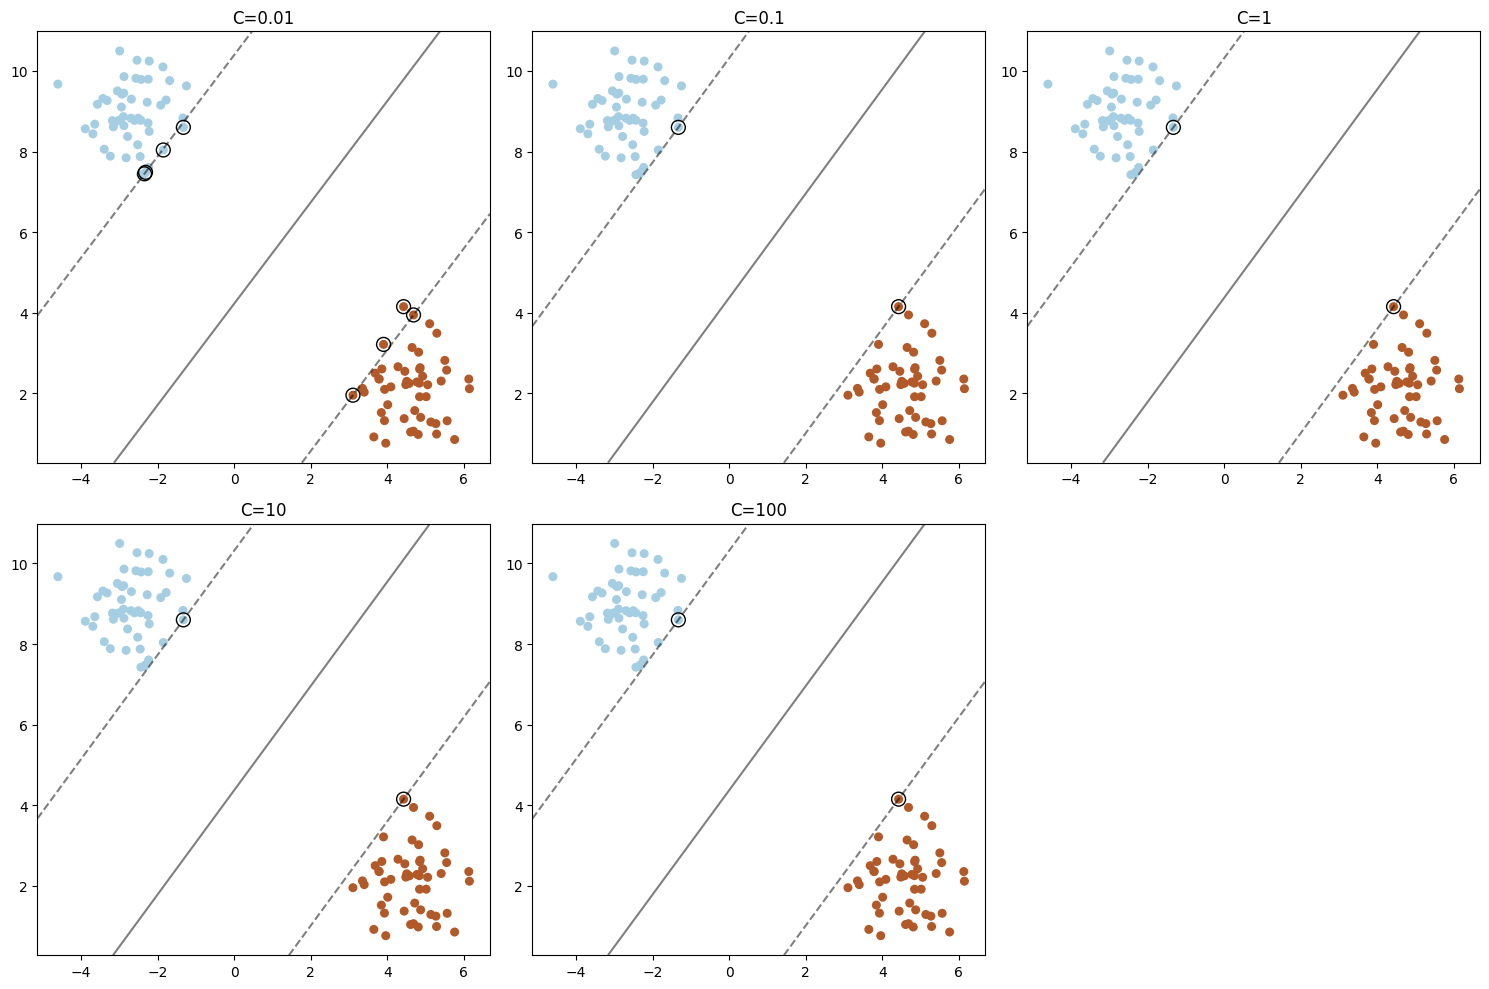

In [ ]:
# ================================================
# 2. Effect of Regularization Parameter C
# ================================================

C_values = [0.01, 0.1, 1, 10, 100]
plt.figure(figsize=(15, 10))

for i, C in enumerate(C_values):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_linear, y_linear)

    plt.subplot(2, 3, i+1)
    plot_svm_boundary(clf, X_linear, y_linear, f"C={C}")
    plt.tight_layout()

"""
Key Observations:
- As C increases:
  - Margin becomes narrower
  - Fewer support vectors (more complex boundary)
  - Higher risk of overfitting
- As C decreases:
  - Margin becomes wider
  - More support vectors (simpler boundary)
  - Higher risk of underfitting
"""



"\nKernel Explanations:\n1. Linear Kernel:\n   - Basic hyperplane separation\n   - Can't handle complex non-linear relationships\n   \n2. RBF (Radial Basis Function) Kernel:\n   - Projects data into infinite-dimensional space\n   - Measures similarity using Gaussian function\n   - Controlled by gamma (γ)\n     - Higher γ => more complex boundaries\n     \n3. Polynomial Kernel:\n   - Projects data into polynomial feature space\n   - Degree parameter controls complexity\n   - Computes (x·x' + c)^d similarity\n"

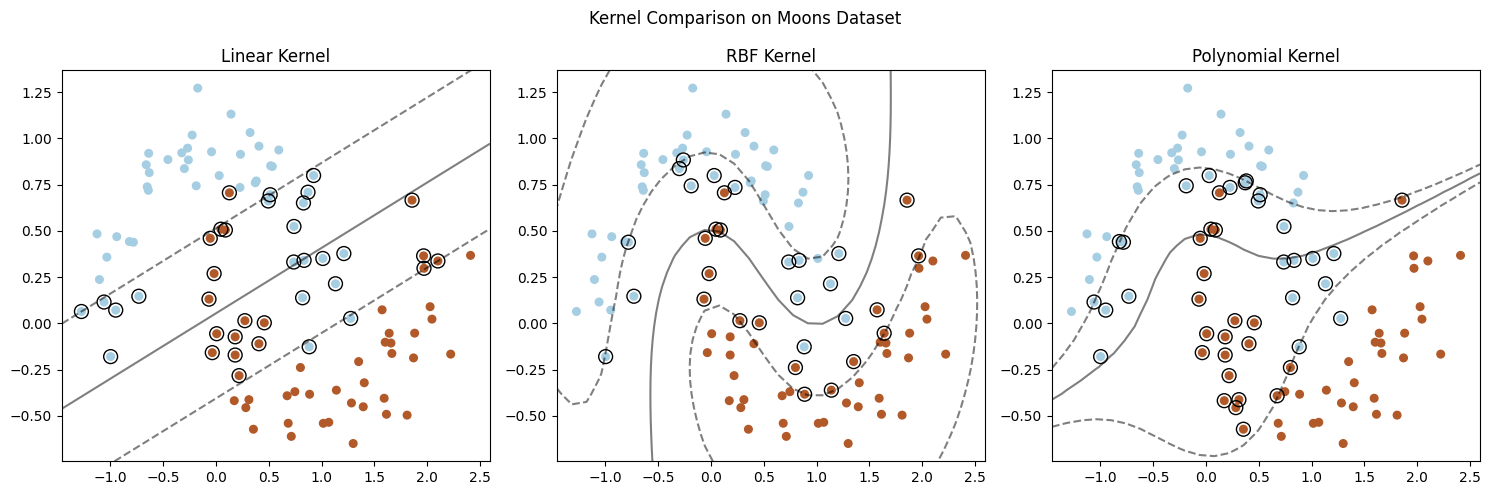

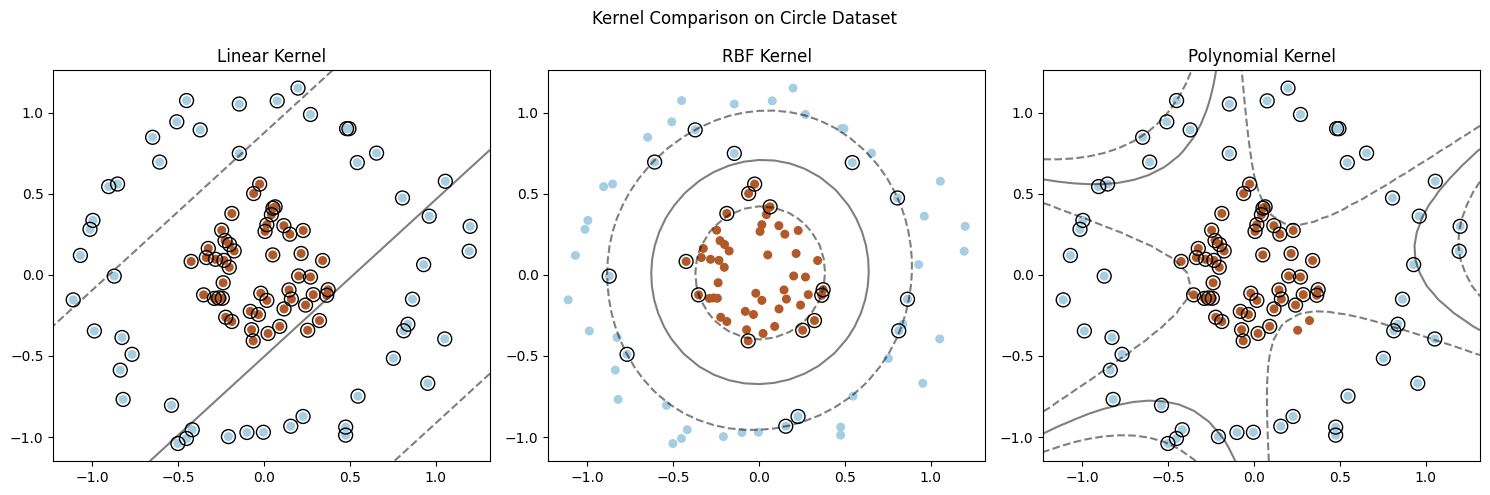

In [ ]:
# ================================================
# 3. Non-linear SVM with Kernel Trick
# ================================================

# Generate non-linear data
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)
X_circles, y_circles = make_circles(n_samples=100, factor=0.3, noise=0.1)

# Create different SVM models
linear_clf = svm.SVC(kernel='linear', C=1)
rbf_clf = svm.SVC(kernel='rbf', gamma=1, C=1)
poly_clf = svm.SVC(kernel='poly', degree=3, C=1)

# Function to plot kernel comparisons
def plot_kernels(X, y, title):
    plt.figure(figsize=(15, 5))

    for i, (clf, name) in enumerate(zip([linear_clf, rbf_clf, poly_clf],
                                       ['Linear', 'RBF', 'Polynomial'])):
        clf.fit(X, y)
        plt.subplot(1, 3, i+1)
        plot_svm_boundary(clf, X, y, f"{name} Kernel")

    plt.suptitle(title)
    plt.tight_layout()

# Compare kernels on moons dataset
plot_kernels(X_moons, y_moons, "Kernel Comparison on Moons Dataset")
plot_kernels(X_circles, y_circles, "Kernel Comparison on Circle Dataset")

"""
Kernel Explanations:
1. Linear Kernel:
   - Basic hyperplane separation
   - Can't handle complex non-linear relationships

2. RBF (Radial Basis Function) Kernel:
   - Projects data into infinite-dimensional space
   - Measures similarity using Gaussian function
   - Controlled by gamma (γ)
     - Higher γ => more complex boundaries

3. Polynomial Kernel:
   - Projects data into polynomial feature space
   - Degree parameter controls complexity
   - Computes (x·x' + c)^d similarity
"""



'\nGamma (γ) Observations:\n- Controls influence of individual training examples\n- Small gamma: \n  - Large similarity radius\n  - Smoother decision boundaries\n- Large gamma:\n  - Small similarity radius\n  - More complex boundaries (risk of overfitting)\n'

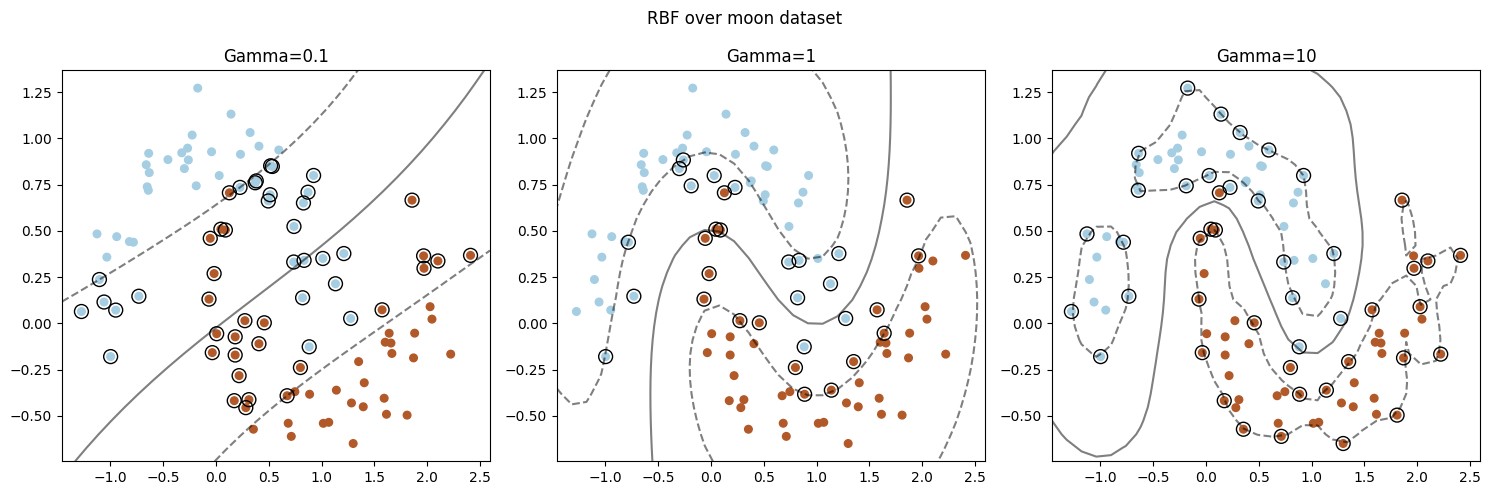

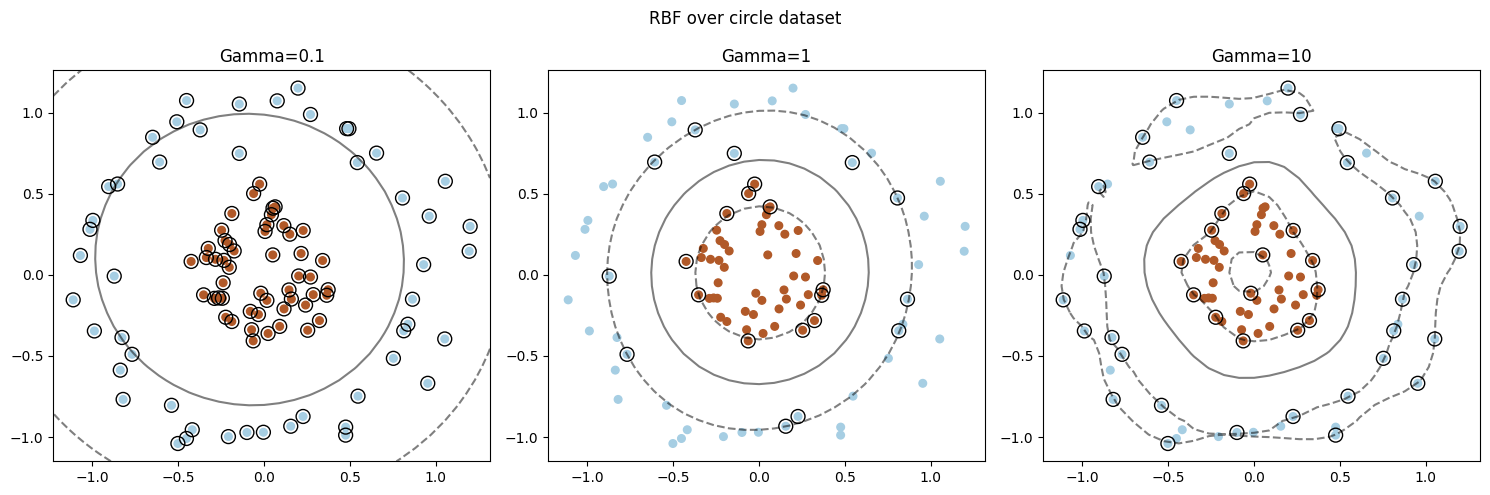

In [ ]:
# ================================================
# 4. Visualizing Support Vectors
# ================================================

# Train RBF SVM with different gamma values
gamma_values = [0.1, 1, 10]

# Original plot_svm_boundary function (from previous cells)
def plot_svm_boundary(clf, X, y, title):  # Renamed to avoid conflict
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)

def plot_gamma_comparison(X, y, title, gamma_values): # Renamed and restructured
    plt.figure(figsize=(15, 5))
    for i, gamma in enumerate(gamma_values):
        clf = svm.SVC(kernel='rbf', gamma=gamma, C=1) # gamma is now correct
        clf.fit(X, y)
        plt.subplot(1, 3, i+1)
        plot_svm_boundary(clf, X, y, f"Gamma={gamma}")  # Call original function
    plt.suptitle(title)
    plt.tight_layout()


plot_gamma_comparison(X_moons, y_moons,"RBF over moon dataset",gamma_values)
plot_gamma_comparison(X_circles, y_circles,"RBF over circle dataset",gamma_values)

"""
Gamma (γ) Observations:
- Controls influence of individual training examples
- Small gamma:
  - Large similarity radius
  - Smoother decision boundaries
- Large gamma:
  - Small similarity radius
  - More complex boundaries (risk of overfitting)
"""



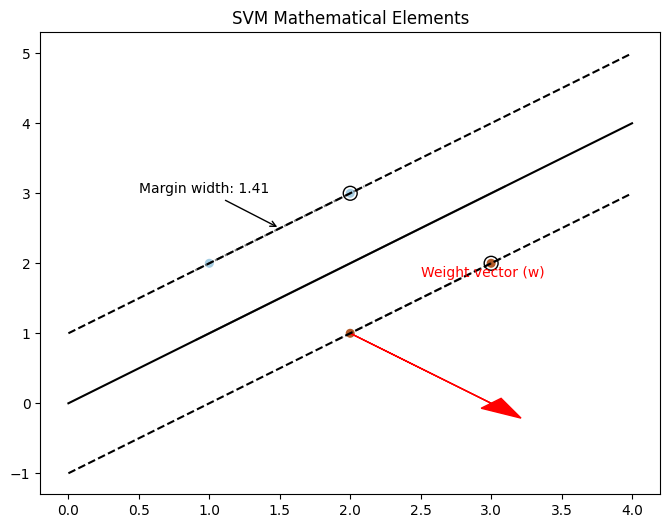

'\nMathematical Elements:\n- Decision boundary: w·x + b = 0\n- Margin boundaries: w·x + b = ±1\n- Margin width: 2/||w||\n- Support vectors lie exactly on margin boundaries\n- Weight vector (w) is orthogonal to decision boundary\n'

In [ ]:
# ================================================
# 5. Mathematical Visualization
# ================================================

# Create simple dataset for mathematical illustration
X_simple = np.array([[1, 2], [2, 3], [2, 1], [3, 2]])
y_simple = [0, 0, 1, 1]

# Train linear SVM
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X_simple, y_simple)

# Extract model parameters
w = clf.coef_[0]
b = clf.intercept_[0]

# Plot mathematical elements
plt.figure(figsize=(8, 6))
plot_svm_boundary(clf, X_simple, y_simple, "SVM Mathematical Elements")

# Add margin lines and annotations
x_plot = np.linspace(0, 4, 100)
margin = 1 / np.linalg.norm(w)
decision_boundary = (-w[0]/w[1] * x_plot) - b/w[1]
margin_positive = (-w[0]/w[1] * x_plot) - (b-1)/w[1]
margin_negative = (-w[0]/w[1] * x_plot) - (b+1)/w[1]

plt.plot(x_plot, decision_boundary, 'k-')
plt.plot(x_plot, margin_positive, 'k--')
plt.plot(x_plot, margin_negative, 'k--')

# Add vector annotations
plt.arrow(2, 1, w[0], w[1], fc='r', ec='r', head_width=0.2)
plt.text(2.5, 1.8, 'Weight vector (w)', color='r')

plt.annotate(f'Margin width: {2*margin:.2f}',
             (1.5, 2.5),
             xytext=(0.5, 3),
             arrowprops=dict(arrowstyle='->'))
plt.show()

"""
Mathematical Elements:
- Decision boundary: w·x + b = 0
- Margin boundaries: w·x + b = ±1
- Margin width: 2/||w||
- Support vectors lie exactly on margin boundaries
- Weight vector (w) is orthogonal to decision boundary
"""